## Setup: 
Setup conda/mamba environment as specified in https://github.com/LorenFrankLab/spyglass/blob/master/environment.yml

In [1]:
import datajoint as dj
import sys
import os

# dj.config['database.host'] = "" # enter datajoint host url
# dj.config['database.user'] = "" # enter datajoint username
# dj.config['database.port'] = 3306
if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")
dj.config.load("dj_local_conf.json")

from spyglass.common.common_behav import StateScriptFile
from spyglass.common.common_task import TaskEpoch
from spyglass.common.common_nwbfile import AnalysisNwbfile
sys.path.append("..")
from trials import TrialInfo

[2024-03-29 21:25:34,624][INFO]: Connecting molly@gl-ash.biostr.washington.edu:3306
[2024-03-29 21:25:34,649][INFO]: Connected molly@gl-ash.biostr.washington.edu:3306


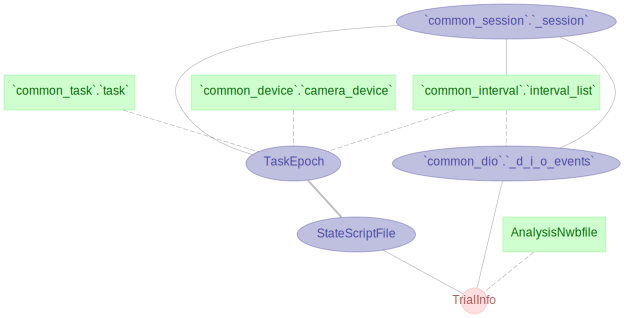

In [2]:
dj.Diagram(TaskEpoch) + dj.Diagram(TrialInfo) - 1

In [3]:
TrialInfo.heading

# 
nwb_file_name        : varchar(64)                  # name of the NWB file
epoch                : int                          # the session epoch for this task and apparatus(1 based)
dio_event_name       : varchar(80)                  # the name assigned to this DIO event
---
analysis_file_name   : varchar(64)                  # name of the file
trial_info_object_id : varchar(40)                  # the NWB object ID for loading this object from the file
parser               : varchar(100)                 # type of parser used to interpret statescript log
descriptors=null     : blob                         # global descriptors for task

## Inserting epochs from a single session:
Normally this would be auto computed from each entry in StateScriptFile, but for now we can test inserting a single session

In [4]:
nwb_file_name = "bobrick20231204_.nwb"

In [5]:
TrialInfo.populate(StateScriptFile & {'nwb_file_name' : nwb_file_name})

[21:25:45][INFO] Spyglass: Skipping sleep epoch: bobrick20231204_.nwb, epoch 1
[21:25:46][INFO] Spyglass: Writing new NWB file bobrick20231204_SK0KG8417H.nwb
[21:25:48][INFO] Spyglass: Skipping sleep epoch: bobrick20231204_.nwb, epoch 3
[21:25:48][INFO] Spyglass: Writing new NWB file bobrick20231204_FIVQV1EL96.nwb
[21:25:50][INFO] Spyglass: Skipping sleep epoch: bobrick20231204_.nwb, epoch 5


In [6]:
TrialInfo()

nwb_file_name name of the NWB file,epoch the session epoch for this task and apparatus(1 based),dio_event_name the name assigned to this DIO event,analysis_file_name name of the file,trial_info_object_id the NWB object ID for loading this object from the file,parser type of parser used to interpret statescript log,descriptors global descriptors for task
bobrick20231204_.nwb,2,homebeam,bobrick20231204_SK0KG8417H.nwb,88d0e8fe-e044-4d9e-8141-e3a1799e389d,V8_delay,=BLOB=
bobrick20231204_.nwb,4,homebeam,bobrick20231204_FIVQV1EL96.nwb,ca7229b7-0489-4dbd-a169-76983381c318,V8_delay,=BLOB=


## Reading the resulting analysis file

In [8]:
# select a specific epoch for the inserted session
restr = {"nwb_file_name": nwb_file_name, "epoch": 4}

In [9]:
# accessing trial descriptors
(TrialInfo & restr).fetch1("descriptors")

{'statescript': 'V8pre_delay_locknoise_uw.sc',
 'lockout_period': 30.0,
 'python_script': 'V8.py',
 'outer_reps': [4, 13],
 'num_goals': 1,
 'forage_num': 1}

In [10]:
# retrieve a dataframe containing info from each trial on the selected epoch
(TrialInfo & restr).fetch1_dataframe()

,start_time,end_time,lockout_starts,lockout_ends,during_lockout,lockout_type,rw_start,rw_end,leave_home,leave_rw,trial_type,outer_well,outer_time,leave_outer,outer_success,goal_well,rw_success
id,,,,,,,,,,,,,,,,,
1,1.701722e+09,1.701722e+09,[],[],[],0,1.701722e+09,1.701722e+09,1.701722e+09,1.701722e+09,1,9,1.701722e+09,1.701722e+09,0.0,5,1
2,1.701722e+09,1.701722e+09,[1701722253.9245481],[1701722283.9245481],[],1,1.701722e+09,1.701722e+09,1.701722e+09,1.701722e+09,1,0,0.000000e+00,0.000000e+00,0.0,5,1
3,1.701722e+09,1.701722e+09,[],[],[],0,1.701722e+09,1.701722e+09,1.701722e+09,1.701722e+09,2,9,1.701722e+09,1.701722e+09,0.0,5,1
4,1.701722e+09,1.701722e+09,[],[],[],0,1.701722e+09,1.701722e+09,1.701722e+09,1.701722e+09,2,4,1.701722e+09,1.701722e+09,0.0,5,1
5,1.701722e+09,1.701722e+09,[],[],[],0,1.701722e+09,1.701722e+09,1.701722e+09,1.701722e+09,2,6,1.701722e+09,1.701722e+09,0.0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1.701728e+09,1.701728e+09,[],[],[],0,1.701728e+09,1.701728e+09,1.701728e+09,1.701728e+09,1,8,1.701728e+09,1.701728e+09,0.0,0,1
124,1.701728e+09,1.701728e+09,[],[],[],0,1.701728e+09,1.701728e+09,1.701728e+09,1.701728e+09,2,6,1.701728e+09,1.701728e+09,0.0,0,1
125,1.701728e+09,1.701728e+09,[],[],[],0,1.701728e+09,1.701728e+09,1.701728e+09,1.701728e+09,1,11,1.701728e+09,1.701728e+09,0.0,0,1


In [11]:
# option: run this cell to get an interactive plot
%matplotlib ipympl # vscode only

# Uncomment this widget instead for jupyter notebook:
#%matplotlib notebook


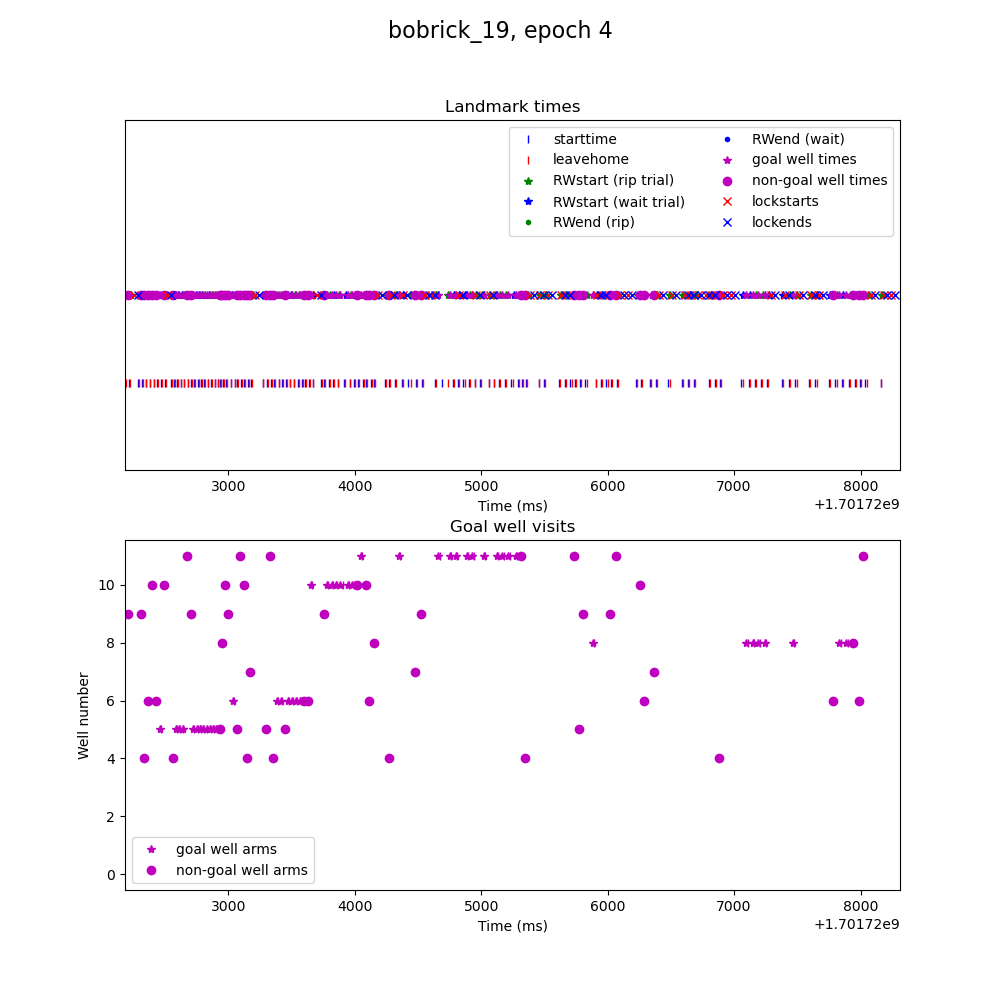

In [12]:
# optional: visualize landmark times during epoch
(TrialInfo & restr).plot_trials()

## Deleting Entries

In [4]:
# Deletes TrialInfo entries from this session
(TrialInfo & {"nwb_file_name" : nwb_file_name}).delete()

[2024-03-16 18:13:10,515][INFO]: Deleting 2 rows from `TrialsInfo`.`__trial_info`


[2024-03-16 18:13:11,969][INFO]: Deletes committed.


2

In [ ]:
TrialInfo & {"nwb_file_name" : nwb_file_name}

In [6]:
# Automatically deletes AnalysisNwbfile entries that are not referenced a downstream table
# AND removes the filepath entries for NWB files that are not in use.
AnalysisNwbfile.nightly_cleanup()

100%|██████████| 4/4 [00:00<00:00, 93.11it/s]
